In [2]:
#!pip install geopandas

In [3]:
#!pip install descartes

In [1]:
#https://qiita.com/paulxll/items/7bc4a5b0529a8d784673
import requests
from bs4 import BeautifulSoup
import time
import tqdm


URL = 'http://www.geocoding.jp/api/'


def coordinate(address):
    """
    addressに住所を指定すると緯度経度を返す。

    >>> coordinate('東京都文京区本郷7-3-1')
    ['35.712056', '139.762775']
    """
    payload = {'q': address}
    html = requests.get(URL, params=payload)
    soup = BeautifulSoup(html.content, "html.parser")
    if soup.find('error'):
        raise ValueError(f"Invalid address submitted. {address}")
    latitude = soup.find('lat').string
    longitude = soup.find('lng').string
    return [latitude, longitude]


def coordinates(addresses, interval=10, progress=True):
    """
    addressesに住所リストを指定すると、緯度経度リストを返す。

    >>> coordinates(['東京都文京区本郷7-3-1', '東京都文京区湯島３丁目３０−１'], progress=False)
    [['35.712056', '139.762775'], ['35.707771', '139.768205']]
    """
    coordinates = []
    for address in progress and tqdm(addresses) or addresses:
        coordinates.append(coordinate(address))
        time.sleep(interval)
    return coordinates


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as  gpd
import os
import descartes
import numpy as np

In [3]:
os.getcwd()

'/Users/masanoritakahashi/Documents/aqi/MAP'

In [299]:
#https://www.diva-gis.org/gdata

#cities=gpd.read_file("/Users/masanoritakahashi/Documents/aqi/Kriging/India_SHP/INDIA.shp")
cities=gpd.read_file("/Users/masanoritakahashi/Documents/aqi/MAP/IND_adm/IND_adm2.shp")

In [300]:
cities.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,105,IND,India,2,Andhra Pradesh,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,105,IND,India,2,Andhra Pradesh,5,Cuddapah,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."


In [301]:
len(cities)

594

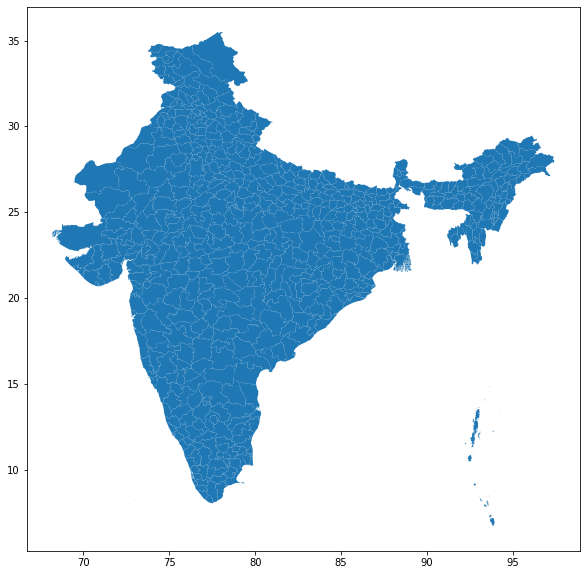

In [330]:
cities.plot(figsize=(10,10))

In [303]:
cities.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,District,District,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,District,District,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
3,105,IND,India,2,Andhra Pradesh,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
4,105,IND,India,2,Andhra Pradesh,5,Cuddapah,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."


In [304]:
tmp=df[["State", "PM25"]]
tmp.columns=["NAME_1", "pm25"]

In [305]:
tmp=tmp.groupby("NAME_1").mean().reset_index()

In [306]:
cities_df=pd.merge(tmp, cities, how="right")

In [307]:
cities_df["NAME_1"][cities_df["pm25"].isnull()].unique()

array(['Andaman and Nicobar', 'Arunachal Pradesh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Goa',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Lakshadweep', 'Manipur',
       'Mizoram', 'Nagaland', 'Orissa', 'Puducherry', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttaranchal'], dtype=object)

# 緯度経度の取得  
欠損値の緯度経度を調べて、クリギングに代入

In [308]:
cols=['Andaman and Nicobar', 'Arunachal Pradesh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Goa',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Lakshadweep', 'Manipur',
       'Mizoram', 'Nagaland', 'Orissa', 'Puducherry', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttaranchal']

In [309]:
AndamanandNicobar=[11.7400867, 92.6586400999999]
ArunachalPradesh=[28.2179994, 94.72775279999996]
Chhattisgarh=[21.2786567, 81.86614420000001]
DadraandNagarHaveli=[20.1808672, 73.01691349999999]
DamanandDiu=[20.428283, 72.83973170000002]
Goa=[15.2993265, 74.12399600000003]
HimachalPradesh=[31.1048294, 77.1733901]
JammuandKashmi=[33.778175, 76.57617140000002]
Lakshadweep=[10.3280265, 72.7846336]
Manipur=[24.6637173, 93.90626880000002]
Mizoram=[23.164543, 92.93757389999996]
Nagaland=[26.1584354, 94.56244259999994]
Orissa=[20.9516658, 85.09852360000002]
Puducherry=[11.9415915, 79.80831330000001]
Sikkim=[27.5329718, 88.51221780000003]
TamilNadu=[11.1271225, 78.65689420000001]
Tripura=[23.9408482, 91.9881527]
Uttaranchal=[30.066753, 79.01929969999992]

In [310]:
x={
    'Andaman and Nicobar':[11.7400867, 92.6586400999999],
    'Arunachal Pradesh':[28.2179994, 94.72775279999996],
    "Chhattisgarh":[21.2786567, 81.86614420000001],
    "Dadra and Nagar Haveli":[20.1808672, 73.01691349999999],
    "Daman and Diu":[20.428283, 72.83973170000002],
    "Goa":[15.2993265, 74.12399600000003],
    "Himachal Pradesh":[31.1048294, 77.1733901],
    "Jammu and Kashmir":[33.778175, 76.57617140000002],
    "Lakshadweep":[10.3280265, 72.7846336],
    "Manipur":[24.6637173, 93.90626880000002],
    "Mizoram":[23.164543, 92.93757389999996],
    "Nagaland":[26.1584354, 94.56244259999994],
    "Orissa":[20.9516658, 85.09852360000002],
    "Puducherry":[11.9415915, 79.80831330000001],
    "Sikkim":[27.5329718, 88.51221780000003],
    "Tamil Nadu":[11.1271225, 78.65689420000001],
    "Tripura":[23.9408482, 91.9881527],
    "Uttaranchal":[30.066753, 79.01929969999992]
}

# クリギング

In [203]:
df=pd.read_excel("/Users/masanoritakahashi/Documents/aqi/Kriging/PM25Data.xlsx", header=1)

In [326]:
df=df.dropna()

In [333]:
df["State"]

0      Andhra Pradesh
1      Andhra Pradesh
2      Andhra Pradesh
3      Andhra Pradesh
4               Assam
            ...      
198             Delhi
199       West Bengal
200         Rajasthan
202           Haryana
203         Karnataka
Name: State, Length: 200, dtype: object

In [111]:
X=df[["Latitude", "Longitude"]].values
y=np.log(df["PM25"].values)

In [113]:
from pyKriging import kriging
k = kriging(X, y)
k.train()

In [114]:
#def get_pm25(lon, lat):
np.exp(k.predict([ 80.947051, 26.828001]))

60.89803546106837

In [335]:
for col in cols:
    lon=x[col][1]
    lat=x[col][0]
    res=np.exp(k.predict([lon, lat]))
    print(res)
    cities_df.loc[cities_df["NAME_1"]==col, "pm25"]=res

0.0006327393290563853
0.00011162760740532671
18.458609876462354
44.176934494861456
69.02805052092505
45.74658778295141
50.78193939458139
45.22662171668015
53.82565591825051
7.329994902250184e-05
0.005134307233691526
8.04583915544696e-05
72.34056993091798
12.982282409818772
48.08088950423806
4.860727226377221
1.5448633579932871
207.67234223846648


In [334]:
res

207.67234223846648

In [312]:
cities_df.head()

,NAME_1,pm25,ID_0,ISO,NAME_0,ID_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,Andhra Pradesh,41.8,105,IND,India,2,3,Anantapur,District,District,None,"Anantpur, Ananthapur","POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
1,Andhra Pradesh,41.8,105,IND,India,2,4,Chittoor,District,District,None,Chitoor|Chittor,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
2,Andhra Pradesh,41.8,105,IND,India,2,5,Cuddapah,District,District,None,None,"POLYGON ((78.94612 15.19465, 78.95062 15.18535..."
3,Andhra Pradesh,41.8,105,IND,India,2,6,East Godavari,District,District,None,None,"MULTIPOLYGON (((82.31735 16.57653, 82.31735 16..."
4,Andhra Pradesh,41.8,105,IND,India,2,7,Guntur,District,District,None,None,"MULTIPOLYGON (((80.78291 15.83764, 80.78291 15..."


In [313]:
cities_df["pm25"]=cities_df["pm25"].astype("float")

In [314]:
print(type(cities))
print(type(cities_df))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [315]:
cities["pm2.5"]=cities_df["pm25"]

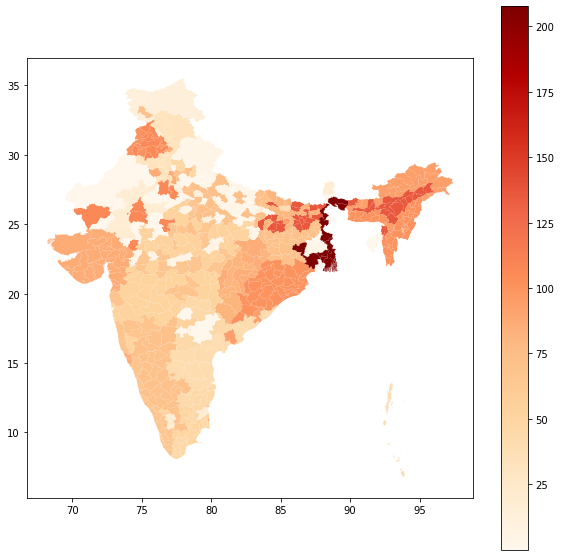

In [320]:
cities.plot(cmap="OrRd", figsize=(10,10), column="pm2.5", legend=True)